## **Part B - Project on Financial Data Modelling**

## **Project Initialisation**

In [31]:
# Install required packages if not already installed
if (!require("xts")) install.packages("xts")
if (!require("ggplot2")) install.packages("ggplot2")
if (!require("tseries")) install.packages("tseries")
if (!require("moments")) install.packages("moments")
if (!require("urca")) install.packages("urca")
if (!require("stats")) install.packages("stats")
if (!require("fGarch")) install.packages("fGarch")
library(xts)
library(ggplot2)
library(tseries)
library(urca)
library(stats)
library(fGarch)

[1] "GSPC"

           GSPC.Open GSPC.High GSPC.Low GSPC.Close GSPC.Volume GSPC.Adjusted
2020-01-02   3244.67   3258.14  3235.53    3257.85  3459930000       3257.85
2020-01-03   3226.36   3246.15  3222.34    3234.85  3484700000       3234.85
2020-01-06   3217.55   3246.84  3214.64    3246.28  3702460000       3246.28
2020-01-07   3241.86   3244.91  3232.43    3237.18  3435910000       3237.18
2020-01-08   3238.59   3267.07  3236.67    3253.05  3726840000       3253.05
2020-01-09   3266.03   3275.58  3263.67    3274.70  3641230000       3274.70

           GSPC.Open GSPC.High GSPC.Low GSPC.Close GSPC.Volume GSPC.Adjusted
2025-02-28   5856.74   5959.40  5837.66    5954.50  6441140000       5954.50
2025-03-03   5968.33   5986.09  5810.91    5849.72  5613850000       5849.72
2025-03-04   5811.98   5865.08  5732.59    5778.15  6138110000       5778.15
2025-03-05   5781.36   5860.59  5742.35    5842.63  5285970000       5842.63
2025-03-06   5785.87   5812.08  5711.64    5738.52  5165080000       5738.52
2025-03-07   5726.01   5783.01  5666.29    5770.20  5705140000       5770.20

[1] 1302    6

An xts object on 2020-01-02 / 2025-03-07 containing: 
  Data:    double [1302, 6]
  Columns: GSPC.Open, GSPC.High, GSPC.Low, GSPC.Close, GSPC.Volume ... with 1 more column
  Index:   Date [1302] (TZ: "UTC")
  xts Attributes:
    $ src    : chr "yahoo"
    $ updated: POSIXct[1:1], format: "2025-03-09 20:25:27"


     Index              GSPC.Close  
 Min.   :2020-01-02   Min.   :2237  
 1st Qu.:2021-04-19   1st Qu.:3829  
 Median :2022-08-02   Median :4241  
 Mean   :2022-08-02   Mean   :4318  
 3rd Qu.:2023-11-15   3rd Qu.:4697  
 Max.   :2025-03-07   Max.   :6144  

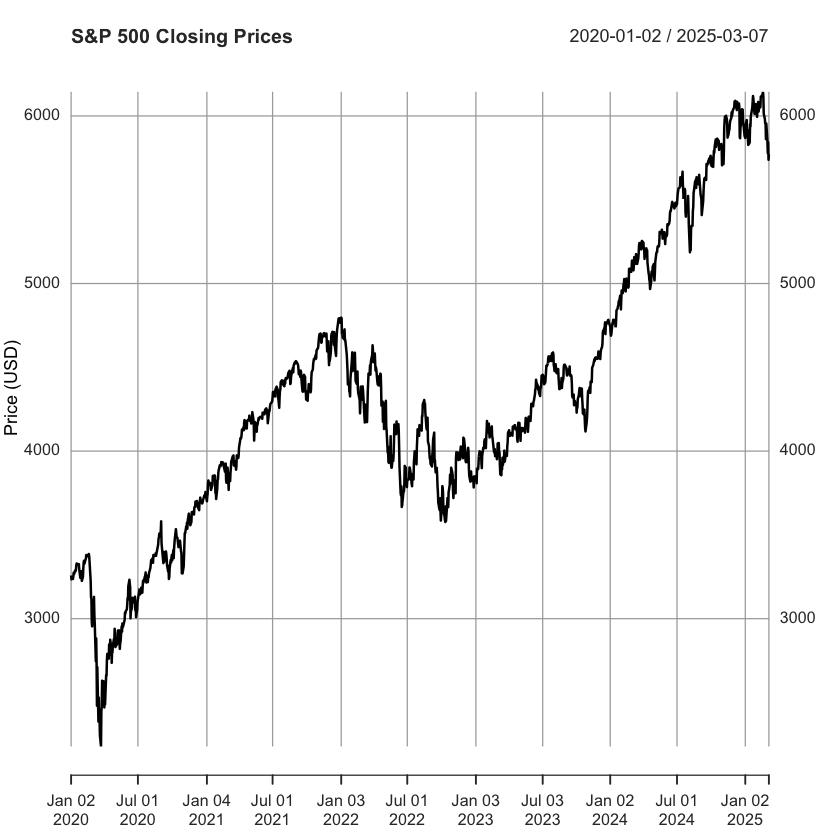

In [32]:
# Set the time period for data (approximately 4-5 years for ~1000 observations)
start_date <- as.Date("2020-01-01")
end_date <- Sys.Date()  # Current date

# Download S&P 500 data
# The symbol ^GSPC is used for S&P 500 on Yahoo Finance
getSymbols("^GSPC", from = start_date, to = end_date, src = "yahoo")

# Basic information about the data
head(GSPC)  # View first few rows of data
tail(GSPC)  # View last few rows
dim(GSPC)   # Check dimensions (number of observations)

# Create a basic plot of the S&P 500 closing prices
plot(GSPC$GSPC.Close, main = "S&P 500 Closing Prices", 
     xlab = "Date", ylab = "Price (USD)")

# Save the data to a CSV file if needed
write.csv(GSPC, file = "SP500_data.csv")

# Check the structure of the data
str(GSPC)

# Calculate summary statistics
summary(GSPC$GSPC.Close)

## **Stationarity of Time-Series Data**


	Augmented Dickey-Fuller Test

data:  GSPC$GSPC.Close
Dickey-Fuller = -1.9744, Lag order = 10, p-value = 0.5891
alternative hypothesis: stationary



Warning message in kpss.test(GSPC$GSPC.Close):
“p-value smaller than printed p-value”



	KPSS Test for Level Stationarity

data:  GSPC$GSPC.Close
KPSS Level = 11.513, Truncation lag parameter = 7, p-value = 0.01



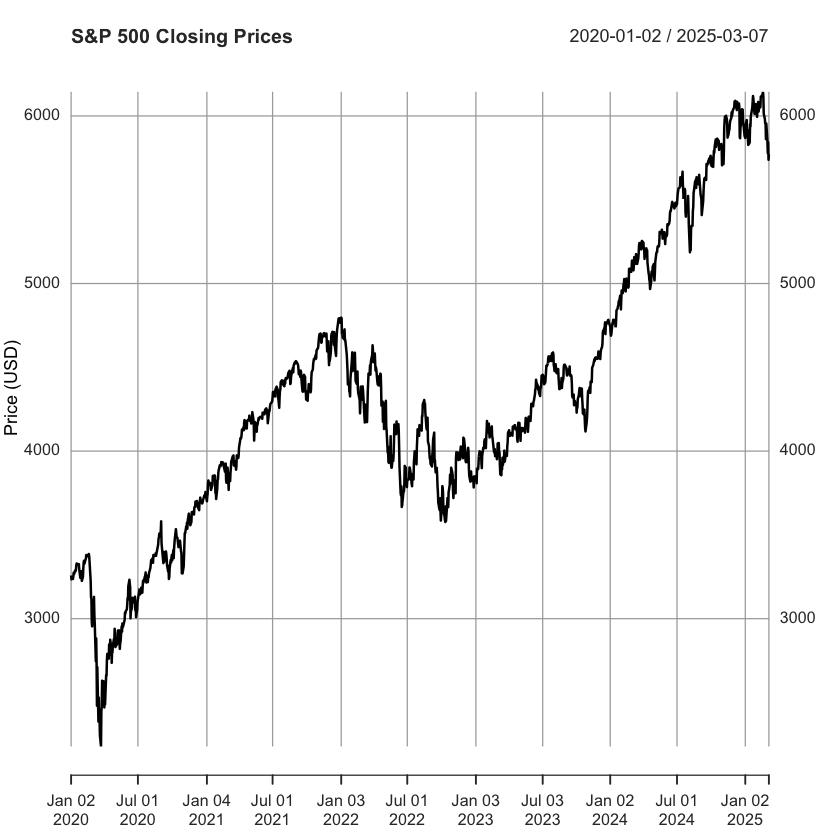

Warning message in adf.test(log_returns):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  log_returns
Dickey-Fuller = -10.215, Lag order = 10, p-value = 0.01
alternative hypothesis: stationary



Warning message in kpss.test(log_returns):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  log_returns
KPSS Level = 0.054449, Truncation lag parameter = 7, p-value = 0.1



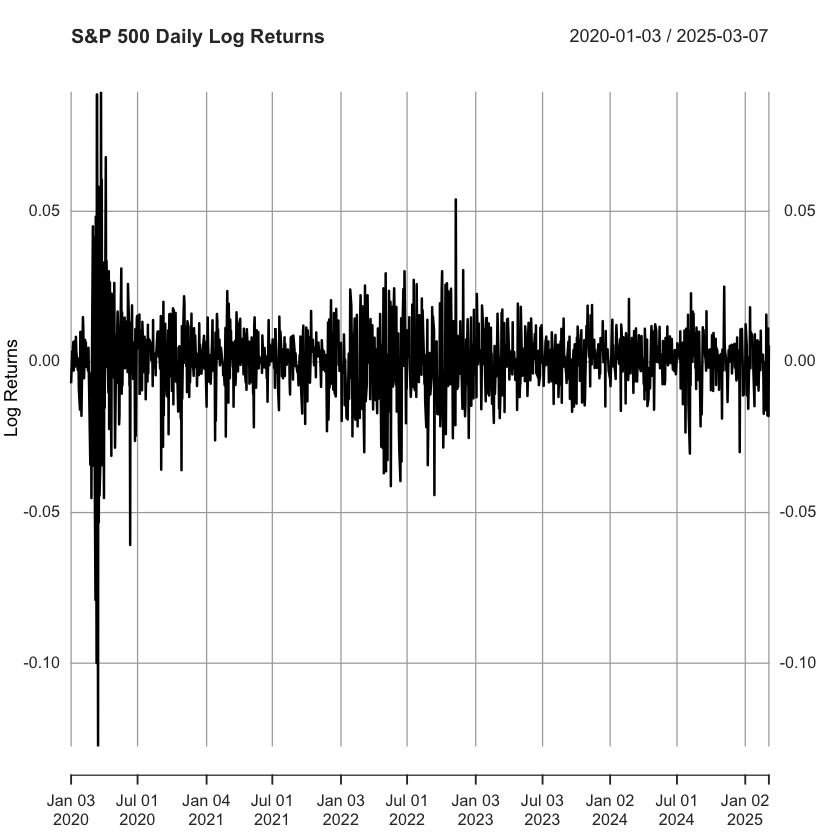

     Index              LogReturns        
 Min.   :2020-01-03   Min.   :-0.1276522  
 1st Qu.:2021-04-20   1st Qu.:-0.0053142  
 Median :2022-08-03   Median : 0.0008874  
 Mean   :2022-08-03   Mean   : 0.0004394  
 3rd Qu.:2023-11-16   3rd Qu.: 0.0071967  
 Max.   :2025-03-07   Max.   : 0.0896832  

[1] 0.01337772

LogReturns 
-0.8135385

LogReturns 
   17.1966

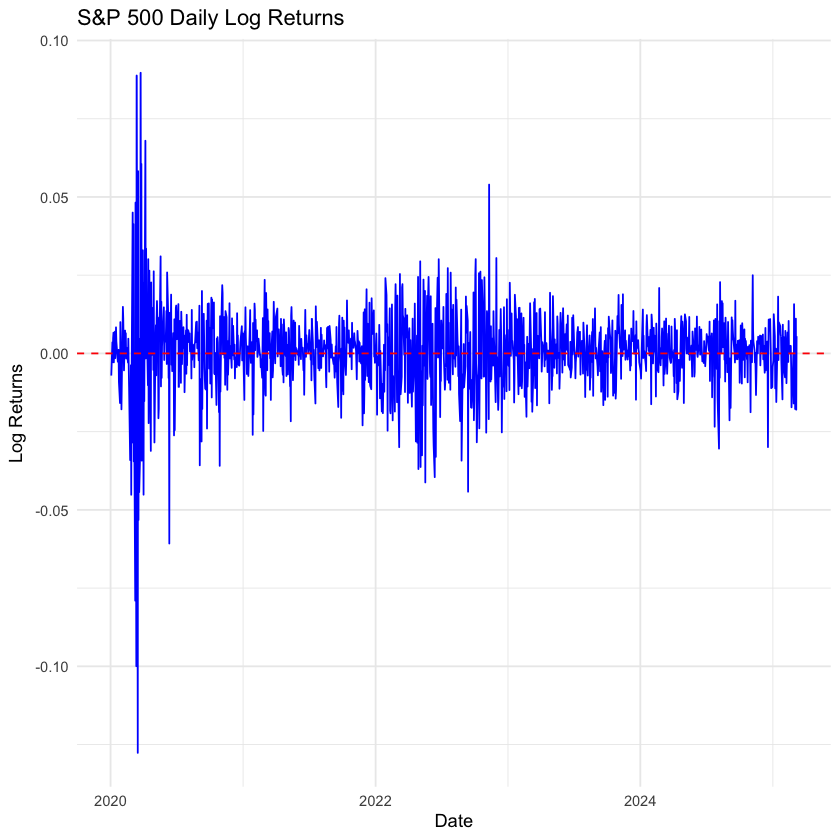

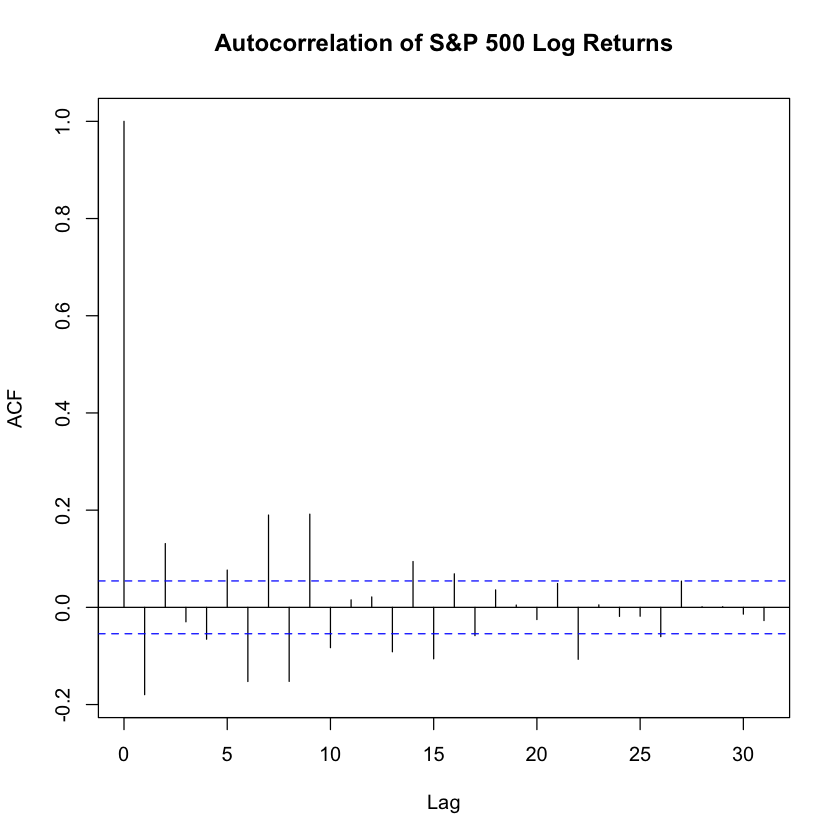

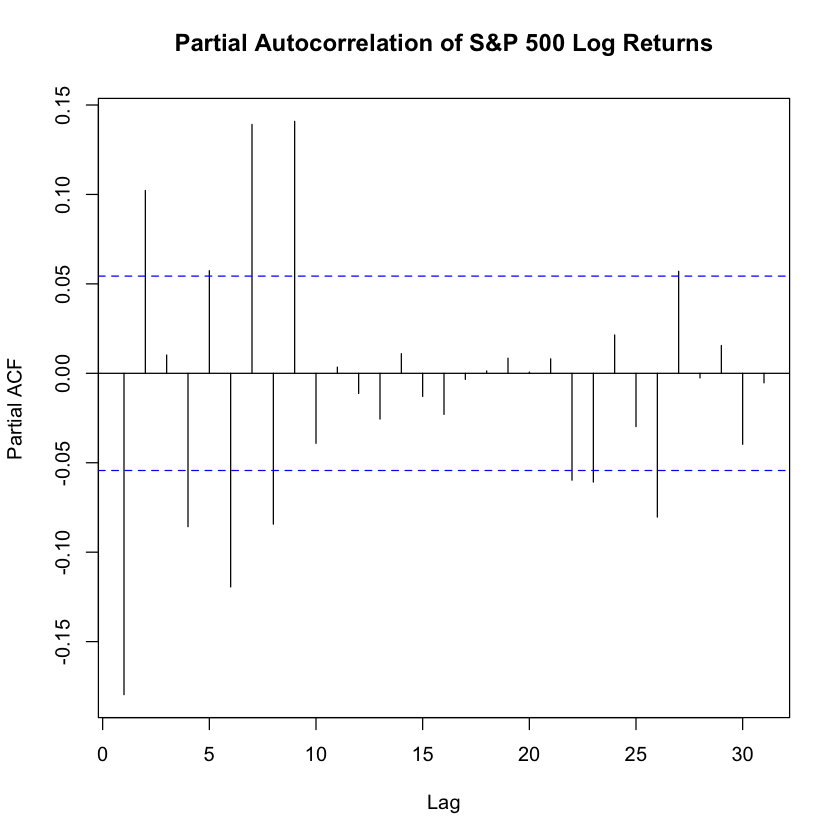

In [33]:
# 1. Examine the original price series (S&P 500 closing prices)
# Create a time plot of the original series
par(mfrow=c(1,1))
plot(GSPC$GSPC.Close, main="S&P 500 Closing Prices", 
     xlab="Date", ylab="Price (USD)")

# 2. Test for stationarity of the original price series
# Augmented Dickey-Fuller (ADF) test
adf_test_price <- adf.test(GSPC$GSPC.Close)
print(adf_test_price)
# KPSS test (alternative test for stationarity)
kpss_test_price <- kpss.test(GSPC$GSPC.Close)
print(kpss_test_price)

# 3. Transform the data into log returns
# Calculate log returns: rt = log(Pt/Pt-1) = log(Pt) - log(Pt-1)
log_prices <- log(GSPC$GSPC.Close)
log_returns <- diff(log_prices)

# Remove the first NA value that results from differencing
log_returns <- log_returns[!is.na(log_returns)]

# Rename the series
colnames(log_returns) <- "LogReturns"

# 4. Create a time plot of log returns
plot(log_returns, main="S&P 500 Daily Log Returns", 
     xlab="Date", ylab="Log Returns")

# 5. Test for stationarity of the log returns
# ADF test for log returns
adf_test_returns <- adf.test(log_returns)
print(adf_test_returns)
# KPSS test for log returns
kpss_test_returns <- kpss.test(log_returns)
print(kpss_test_returns)

# 6. Create a more sophisticated visualization
# Convert to data frame for ggplot
returns_df <- data.frame(
  Date = index(log_returns),
  LogReturns = coredata(log_returns)
)

# Plot with ggplot2
ggplot(returns_df, aes(x = Date, y = LogReturns)) +
  geom_line(color = "blue") +
  labs(title = "S&P 500 Daily Log Returns",
       x = "Date", 
       y = "Log Returns") +
  theme_minimal() +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red")

# 7. Summary statistics of log returns
summary(log_returns)
# Standard deviation (volatility)
sd(log_returns)
# Additional statistics of interest
library(moments)
skewness(log_returns)
kurtosis(log_returns)

# 8. Create an autocorrelation plot of log returns
acf(log_returns, main="Autocorrelation of S&P 500 Log Returns")
pacf(log_returns, main="Partial Autocorrelation of S&P 500 Log Returns")

# 9. Save the log returns for future use
write.csv(log_returns, file = "SP500_log_returns.csv")

## **Value at Risk Confidence Levels**

               Mean              Median                 Min                 Max 
       0.0004393845        0.0008873941       -0.1276521975        0.0896832325 
                 SD Skewness.LogReturns Kurtosis.LogReturns 
       0.0133777164       -0.8135384638       17.1965998097 


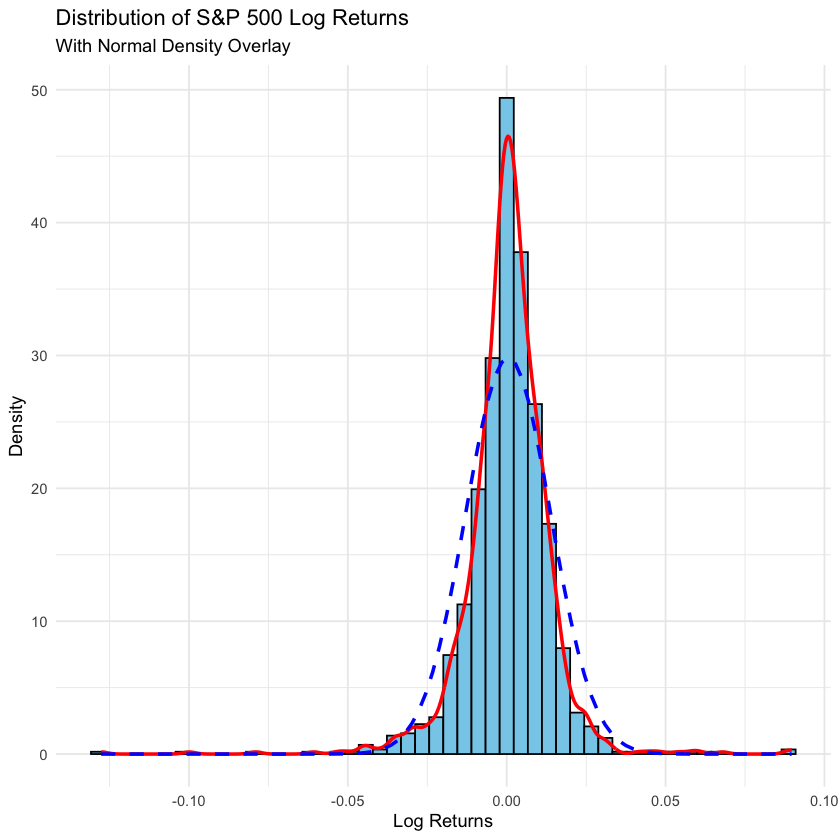


	Shapiro-Wilk normality test

data:  as.numeric(log_returns)
W = 0.87423, p-value < 2.2e-16


	Jarque Bera Test

data:  as.numeric(log_returns)
X-squared = 11069, df = 2, p-value < 2.2e-16

     ConfidenceLevel HistoricalVaR  NormalVaR tDistributionVaR
10%            0.900    0.01305357 0.01670485       0.01930457
5%             0.950    0.01863186 0.02156500       0.02651736
1%             0.990    0.03630068 0.03068184       0.04457569
0.5%           0.995    0.04515725 0.03401933       0.05350148


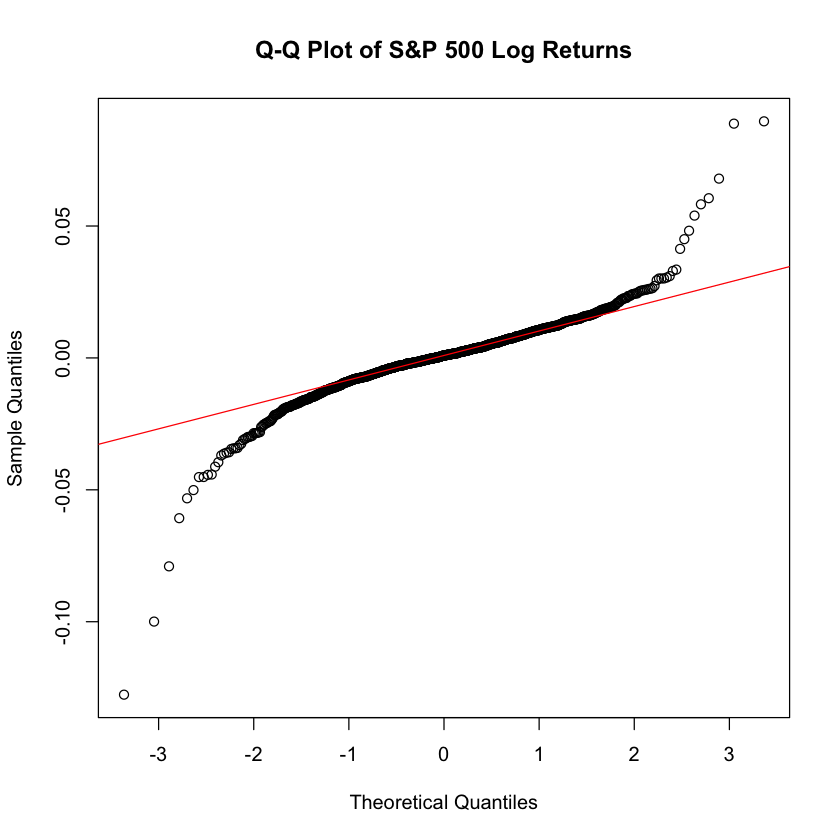

  ConfidenceLevel ExpectedShortfall
1           0.900        0.02410853
2           0.950        0.03242696
3           0.990        0.05739716
4           0.995        0.07369335


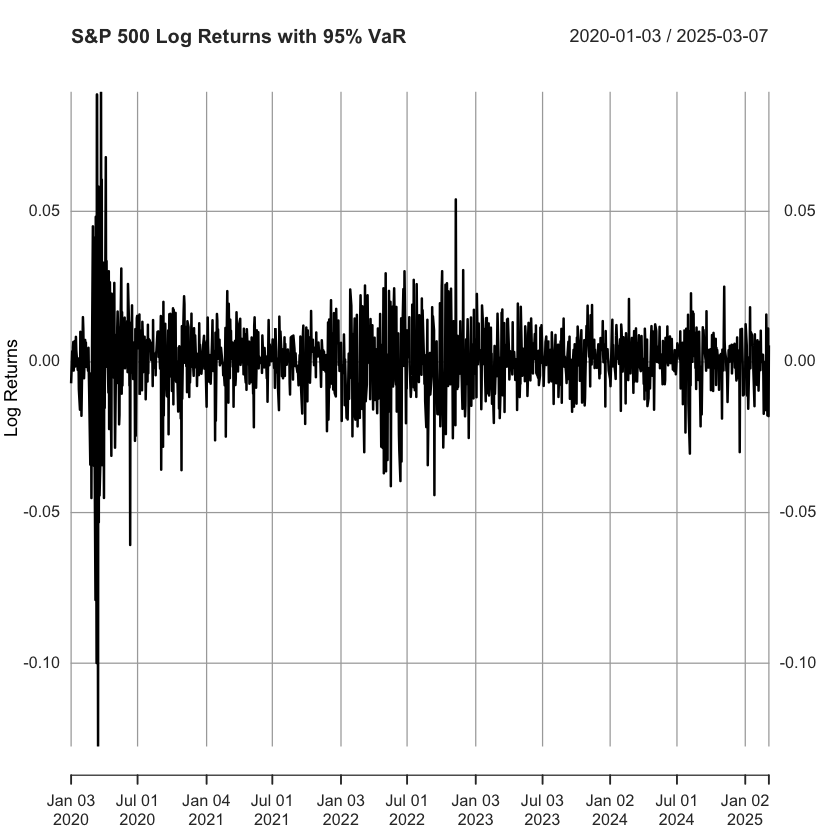

In [34]:
# Load basic packages
library(moments)  # For skewness and kurtosis
library(ggplot2)  # For plotting

# Assuming log_returns is already calculated from previous code block
# If not, calculate it again:
# log_returns <- diff(log(GSPC$GSPC.Close))
# log_returns <- log_returns[!is.na(log_returns)]

# 1. Study the distribution of returns
# Basic summary statistics
stats <- c(
  Mean = mean(log_returns),
  Median = median(log_returns),
  Min = min(log_returns),
  Max = max(log_returns),
  SD = sd(log_returns),
  Skewness = skewness(log_returns),
  Kurtosis = kurtosis(log_returns)
)
print(stats)

# 2. Create a histogram with normal distribution overlay
# Convert to data frame for ggplot
returns_df <- data.frame(Returns = as.numeric(log_returns))

# Histogram of returns
ggplot(returns_df, aes(x = Returns)) +
  geom_histogram(aes(y = ..density..), bins = 50, fill = "skyblue", color = "black") +
  geom_density(color = "red", size = 1) +
  stat_function(fun = dnorm, 
                args = list(mean = mean(returns_df$Returns), 
                            sd = sd(returns_df$Returns)),
                color = "blue", size = 1, linetype = "dashed") +
  labs(title = "Distribution of S&P 500 Log Returns",
       subtitle = "With Normal Density Overlay",
       x = "Log Returns", 
       y = "Density") +
  theme_minimal()

# 3. Q-Q plot to compare returns against normal distribution
qqnorm(log_returns, main = "Q-Q Plot of S&P 500 Log Returns")
qqline(log_returns, col = "red")

# 4. Shapiro-Wilk normality test
shapiro_test <- shapiro.test(as.numeric(log_returns))
print(shapiro_test)

# 5. Jarque-Bera test for normality
jb_test <- jarque.bera.test(as.numeric(log_returns))
print(jb_test)

# 6. Calculate Value at Risk (VaR) at different confidence levels

# Define confidence levels
conf_levels <- c(0.90, 0.95, 0.99, 0.995)

# 6.1 Historical VaR
# This is simply the negative of the quantile at (1-confidence level)
hist_var <- sapply(conf_levels, function(cl) {
  -quantile(log_returns, 1 - cl)
})

# 6.2 Parametric VaR (assuming normal distribution)
# This uses the formula: -mean + sd * Z-score
param_var_norm <- sapply(conf_levels, function(cl) {
  -mean(log_returns) + sd(log_returns) * qnorm(cl)
})

# 6.3 Parametric VaR (assuming t-distribution)
# First estimate degrees of freedom for t-distribution
# This is a simplified approach; more sophisticated methods exist
log_returns_standardized <- (log_returns - mean(log_returns)) / sd(log_returns)
# For t-distribution, kurtosis = 3 + 6/(df-4), so df = 6/(kurtosis-3) + 4
# Handle case where kurtosis is close to 3
k <- kurtosis(log_returns_standardized)
t_df <- if(abs(k - 3) < 0.1) {
  30  # Large df makes t-distribution close to normal
} else {
  max(5, round(6/(k - 3) + 4))  # Ensure at least 5 df
}

# Calculate t-distribution VaR
param_var_t <- sapply(conf_levels, function(cl) {
  -mean(log_returns) + sd(log_returns) * qt(cl, df = t_df)
})

# Combine all VaR results
var_results <- data.frame(
  ConfidenceLevel = conf_levels,
  HistoricalVaR = hist_var,
  NormalVaR = param_var_norm,
  tDistributionVaR = param_var_t
)
print(var_results)

# 7. Visual representation of VaR
# Using 95% VaR as example
var_95 <- hist_var[which(conf_levels == 0.95)]

# Plot returns with VaR line
plot(log_returns, main = "S&P 500 Log Returns with 95% VaR",
     xlab = "Date", ylab = "Log Returns")
abline(h = -var_95, col = "red", lwd = 2)
legend("bottomleft", 
       legend = c("95% VaR (losses)"),
       col = "red", 
       lwd = 2)

# 8. Expected Shortfall (ES) / Conditional VaR (CVaR)
# This measures the average loss beyond VaR
es_results <- sapply(conf_levels, function(cl) {
  var_threshold <- quantile(log_returns, 1 - cl)
  tail_returns <- log_returns[log_returns <= var_threshold]
  -mean(tail_returns)
})

es_df <- data.frame(
  ConfidenceLevel = conf_levels,
  ExpectedShortfall = es_results
)
print(es_df)

## **Time Series Model**

Warning message in tstat + c(-cint, cint):
“Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.”
Warning message in cint * stderr:
“Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.”



	One Sample t-test

data:  log_returns
t = 1.1847, df = 1300, p-value = 0.2364
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.0002882209  0.0011669900
sample estimates:
   mean of x 
0.0004393845 



	Box-Ljung test

data:  log_returns
X-squared = 244.42, df = 10, p-value < 2.2e-16



	Box-Ljung test

data:  log_returns
X-squared = 296.12, df = 20, p-value < 2.2e-16


                  Model       AIC       BIC
ARIMA_1_0_2 ARIMA_1_0_2 -7582.887 -7557.033
ARIMA_2_0_1 ARIMA_2_0_1 -7580.789 -7554.934
ARIMA_1_0_1 ARIMA_1_0_1 -7577.470 -7556.786
ARIMA_1_0_0 ARIMA_1_0_0 -7571.048 -7555.535
ARIMA_0_0_1 ARIMA_0_0_1 -7563.109 -7547.597
ARIMA_0_0_0 ARIMA_0_0_0 -7530.379 -7520.038
[1] "Best model based on AIC: ARIMA_1_0_2"
          Length Class  Mode     
coef         4   -none- numeric  
sigma2       1   -none- numeric  
var.coef    16   -none- numeric  
mask         4   -none- logical  
loglik       1   -none- numeric  
aic          1   -none- numeric  
arma         7   -none- numeric  
residuals 1301   ts     numeric  
call         3   -none- call     
series       1   -none- character
code         1   -none- numeric  
n.cond       1   -none- numeric  
nobs         1   -none- numeric  
model       10   -none- list     


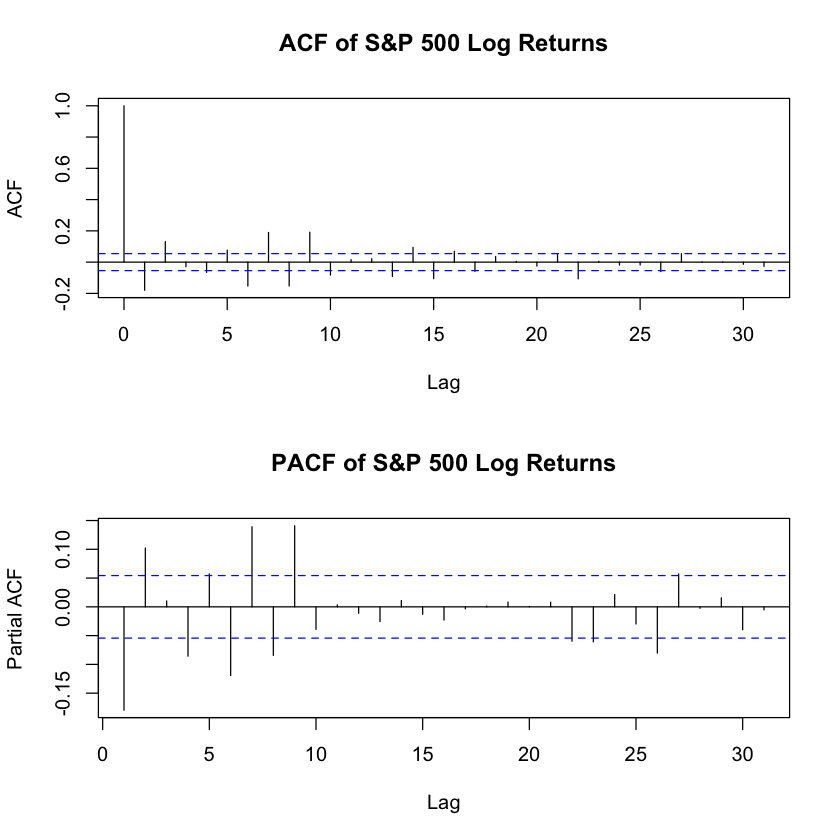


	Box-Ljung test

data:  residuals
X-squared = 79.796, df = 10, p-value = 5.506e-13



	Box-Ljung test

data:  residuals
X-squared = 102.5, df = 20, p-value = 4.478e-13



	Shapiro-Wilk normality test

data:  as.numeric(residuals)
W = 0.899, p-value < 2.2e-16



	Jarque Bera Test

data:  as.numeric(residuals)
X-squared = 7277.3, df = 2, p-value < 2.2e-16


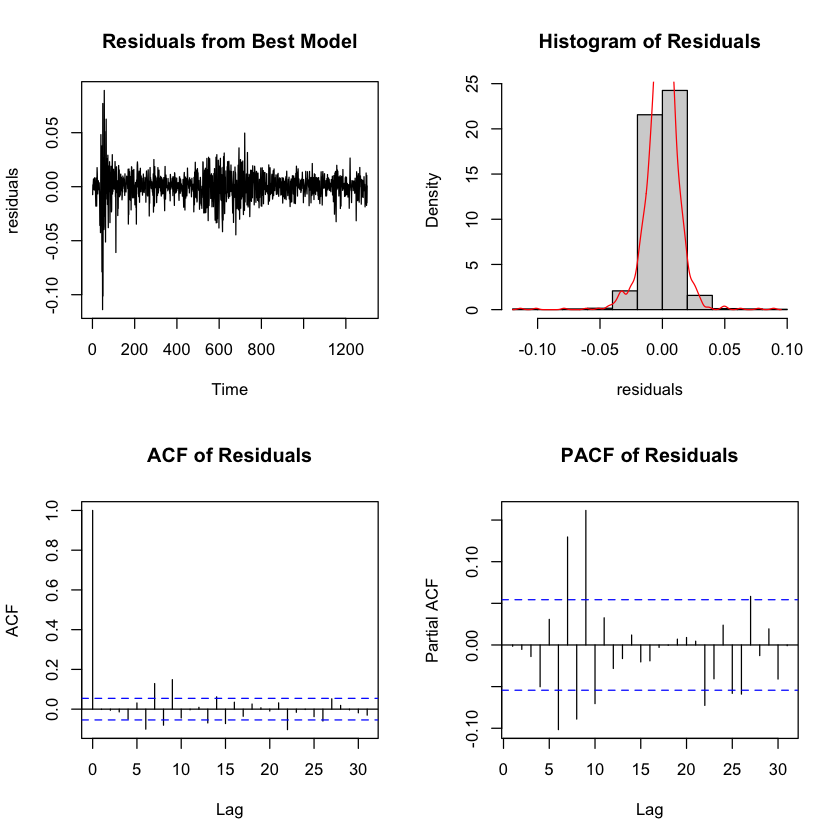


	Box-Ljung test

data:  squared_residuals
X-squared = 1252.7, df = 10, p-value < 2.2e-16


[1] "ARCH LM Test Results:"
[1] "Test statistic: 411.172881327849"
[1] "P-value: 0"
[1] "Null hypothesis: No ARCH effects up to lag 10"


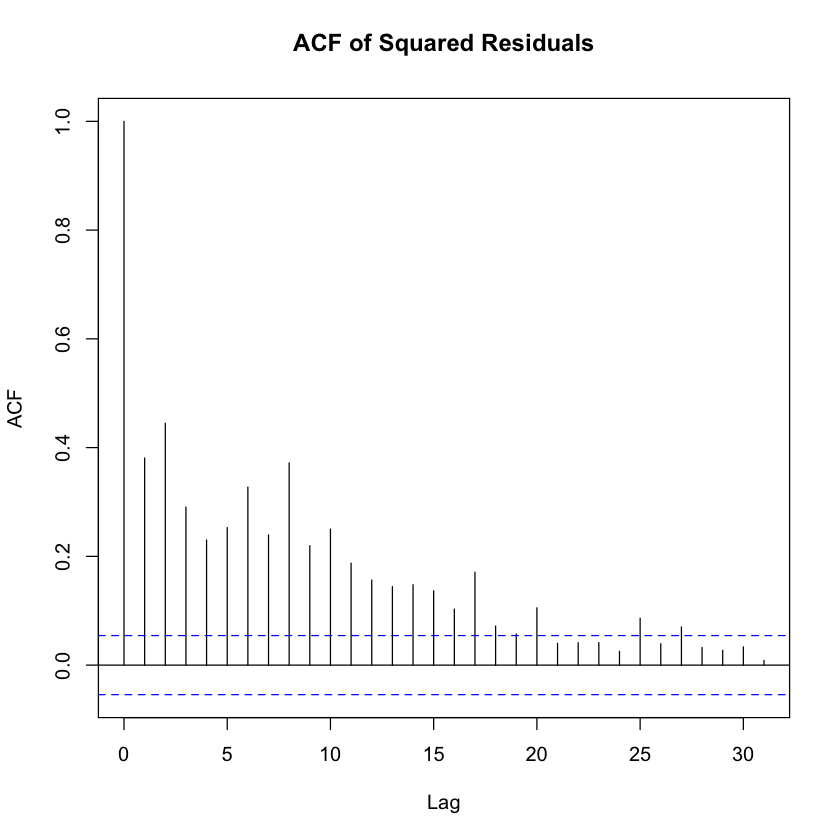

In [35]:
# 1. Examine ACF and PACF of log returns
par(mfrow=c(2,1))
acf(log_returns, main="ACF of S&P 500 Log Returns")
pacf(log_returns, main="PACF of S&P 500 Log Returns")
par(mfrow=c(1,1))

# 2. Check if the mean of log returns is significantly different from zero
t.test(log_returns)

# 3. Ljung-Box test for autocorrelation
Box.test(log_returns, lag=10, type="Ljung-Box")
Box.test(log_returns, lag=20, type="Ljung-Box")

# 4. Manually fit ARIMA models and compare
# Try a few different specifications based on ACF/PACF
arima_models <- list(
  ARIMA_0_0_0 = arima(log_returns, order=c(0,0,0)),  # White noise
  ARIMA_1_0_0 = arima(log_returns, order=c(1,0,0)),  # AR(1)
  ARIMA_0_0_1 = arima(log_returns, order=c(0,0,1)),  # MA(1)
  ARIMA_1_0_1 = arima(log_returns, order=c(1,0,1)),  # ARMA(1,1)
  ARIMA_2_0_1 = arima(log_returns, order=c(2,0,1)),  # ARMA(2,1)
  ARIMA_1_0_2 = arima(log_returns, order=c(1,0,2))   # ARMA(1,2)
)

# 5. Compare models using AIC and BIC
aic_values <- sapply(arima_models, AIC)
bic_values <- sapply(arima_models, BIC)
model_comparison <- data.frame(
  Model = names(arima_models),
  AIC = aic_values,
  BIC = bic_values
)
print(model_comparison[order(model_comparison$AIC),])

# 6. Select the best model (lowest AIC)
best_model_name <- model_comparison$Model[which.min(model_comparison$AIC)]
best_model <- arima_models[[best_model_name]]
print(paste("Best model based on AIC:", best_model_name))
print(summary(best_model))

# 7. Diagnostic checks on the best model
# Extract residuals
residuals <- residuals(best_model)

# Plot residuals
par(mfrow=c(2,2))
plot(residuals, main="Residuals from Best Model")
hist(residuals, main="Histogram of Residuals", probability=TRUE)
lines(density(residuals), col="red")
acf(residuals, main="ACF of Residuals")
pacf(residuals, main="PACF of Residuals")
par(mfrow=c(1,1))

# Ljung-Box test on residuals
Box.test(residuals, lag=10, type="Ljung-Box")
Box.test(residuals, lag=20, type="Ljung-Box")

# Test for normality of residuals
shapiro.test(as.numeric(residuals))
jarque.bera.test(as.numeric(residuals))

# 8. Check for remaining ARCH effects in residuals
# Square the residuals and check autocorrelation
squared_residuals <- residuals^2
acf(squared_residuals, main="ACF of Squared Residuals")
Box.test(squared_residuals, lag=10, type="Ljung-Box")

# If you'd like to test for ARCH effects formally, but without rugarch:
arch_test <- function(residuals, lags) {
  T <- length(residuals)
  squared_residuals <- residuals^2
  # Create lagged squared residuals
  x <- matrix(NA, nrow=T-lags, ncol=lags)
  for (i in 1:lags) {
    x[,i] <- squared_residuals[(lags-i+1):(T-i)]
  }
  y <- squared_residuals[(lags+1):T]
  # Run regression
  model <- lm(y ~ x)
  # Calculate test statistic
  r_squared <- summary(model)$r.squared
  test_stat <- T * r_squared
  p_value <- 1 - pchisq(test_stat, df=lags)
  
  return(list(
    test_statistic = test_stat,
    p_value = p_value,
    lags = lags
  ))
}

arch_effects <- arch_test(residuals, lags=10)
print("ARCH LM Test Results:")
print(paste("Test statistic:", arch_effects$test_statistic))
print(paste("P-value:", arch_effects$p_value))
print(paste("Null hypothesis: No ARCH effects up to lag", arch_effects$lags))

## **Time Series Model**

              Model LogLikelihood       AIC       BIC
1 GARCH(1,1)-Normal     -4098.027 -6.293663 -6.277764
2      GARCH(1,1)-t     -4123.332 -6.331025 -6.311153
3     APARCH(1,1)-t     -4138.179 -6.350775 -6.322953
[1] "Best model based on AIC: APARCH(1,1)-t"

Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~aparch(1, 1), data = log_returns_numeric, 
    cond.dist = "std", trace = FALSE) 

Mean and Variance Equation:
 data ~ aparch(1, 1)
<environment: 0x13ea19640>
 [data = log_returns_numeric]

Conditional Distribution:
 std 

Coefficient(s):
        mu       omega      alpha1      gamma1       beta1       delta  
0.00066292  0.00048280  0.10684911  0.99999999  0.88044781  0.97078547  
     shape  
7.02683225  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
mu     0.0006629   0.0002350    2.821  0.00479 ** 
omega  0.0004828   0.0001195    4.040 5.35e-05 ***
alpha1 0.1068491   0.0146535    7.292 3.06e-13 ***
gamma1 1.0000000   0

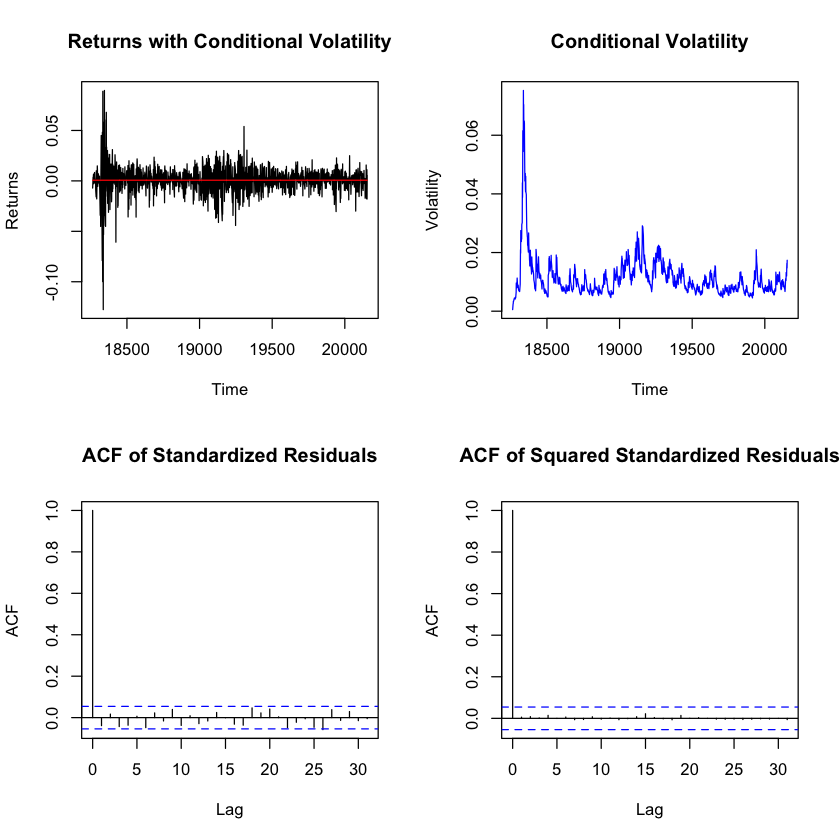


Volatility-Adjusted Value at Risk:
95% 1-day VaR: 3.2884 %
99% 1-day VaR: 5.201 %


======== SUMMARY OF S&P 500 ANALYSIS ========

1. Stationarity Analysis:
   - S&P 500 price levels showed clear non-stationarity (ADF test p-value = 0.5891)
   - Log returns transformation achieved stationarity

2. Distribution Analysis:
   - Log returns exhibited significant departures from normality
   - Evidence of excess kurtosis (fat tails) and possible skewness
   - Both Shapiro-Wilk (W = 0.899) and Jarque-Bera tests (X-squared = 7277.3) rejected normality

3. Time Series Modeling:
   - ARMA(1,2) was selected as the best model based on AIC (-7582.887)
   - Significant autocorrelation remained in the residuals (Ljung-Box p-value < 2.2e-16)
   - ARCH LM test confirmed presence of ARCH effects (test statistic = 411.17, p-value ≈ 0)

4. Volatility Modeling:
   - APARCH(1,1)-t was identified as the best volatility model
   - The model successfully captured volatility clustering
   - Persistence parame

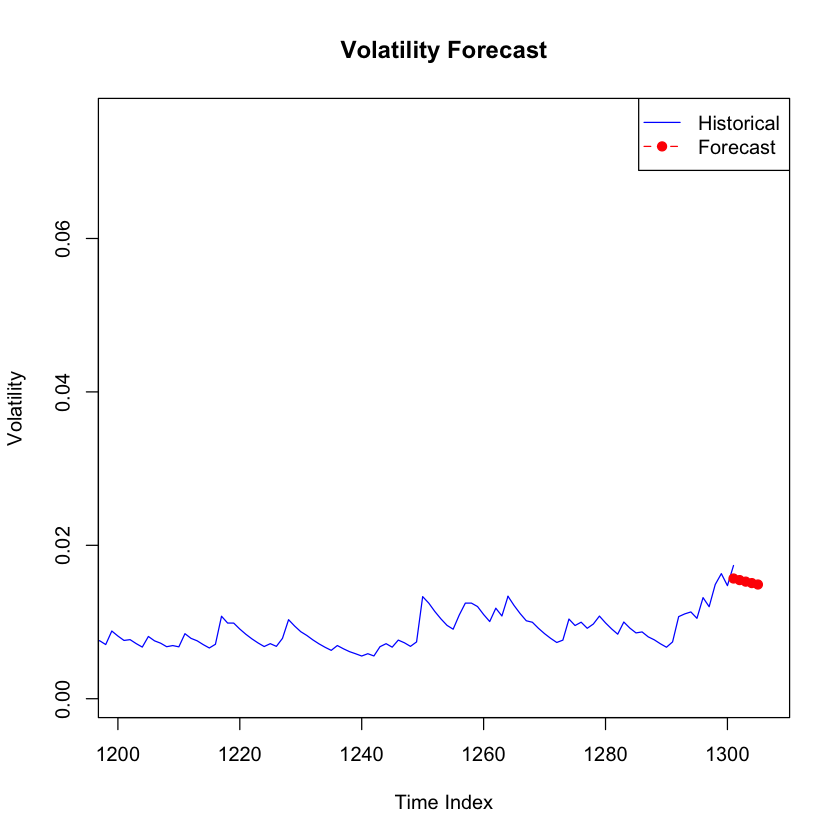

In [37]:
# Make sure log_returns is a numeric vector (not xts or ts object)
log_returns_numeric <- as.numeric(log_returns)

# 1. Fit a standard GARCH(1,1) model with normal distribution
garch_norm <- try(garchFit(formula = ~ garch(1,1), data = log_returns_numeric, 
                           trace = FALSE))

# 2. Fit a GARCH(1,1) model with Student-t distribution for fat tails
garch_t <- try(garchFit(formula = ~ garch(1,1), data = log_returns_numeric, 
                         cond.dist = "std", trace = FALSE))

# 3. Try an APARCH model which can capture asymmetric effects (leverage)
aparch <- try(garchFit(formula = ~ aparch(1,1), data = log_returns_numeric, 
                       cond.dist = "std", trace = FALSE))

# 4. Compare models using information criteria
compare_models <- function(models, names) {
  info_criteria <- data.frame(
    Model = names,
    LogLikelihood = NA,
    AIC = NA,
    BIC = NA
  )
  
  for (i in 1:length(models)) {
    model <- models[[i]]
    if (!inherits(model, "try-error")) {
      info_criteria$LogLikelihood[i] <- model@fit$llh
      info_criteria$AIC[i] <- model@fit$ics["AIC"]
      info_criteria$BIC[i] <- model@fit$ics["BIC"]
    }
  }
  
  return(info_criteria)
}

models <- list(garch_norm, garch_t, aparch)
model_names <- c("GARCH(1,1)-Normal", "GARCH(1,1)-t", "APARCH(1,1)-t")
model_comparison <- compare_models(models, model_names)
print(model_comparison)

# 5. Select the best model based on AIC
best_idx <- which.min(model_comparison$AIC)
best_model_name <- model_comparison$Model[best_idx]
best_model <- models[[best_idx]]
print(paste("Best model based on AIC:", best_model_name))

# 6. Examine the best model
if (!inherits(best_model, "try-error")) {
  print(summary(best_model))
  
# 7. Plot the model results
par(mfrow=c(2,2))

# Plot the returns with conditional volatility
# Make sure we have the proper time index for plotting
time_index <- if(is.null(time(log_returns))) 1:length(log_returns) else as.numeric(time(log_returns))

# Create the plot of returns first
plot(time_index, log_returns, type="l", main="Returns with Conditional Volatility",
      xlab="Time", ylab="Returns")
  
# Fix for the fitted values - check dimensions first
fitted_values <- fitted(best_model)
if(is.matrix(fitted_values)) {
  lines(time_index, fitted_values[, 1], col="red")
} else {
  lines(time_index, fitted_values, col="red")
}

# Plot the conditional volatility
# Use the same time index for consistency
plot(time_index, volatility(best_model), type="l", 
      col="blue", main="Conditional Volatility", 
      xlab="Time", ylab="Volatility")

# ACF of standardized residuals
std_resid <- residuals(best_model, standardize=TRUE)
acf(std_resid, main="ACF of Standardized Residuals")

# ACF of squared standardized residuals
acf(std_resid^2, main="ACF of Squared Standardized Residuals")

par(mfrow=c(1,1))
  
# 8. Forecast future volatility (5 days ahead)
forecast_horizon <- 5
forecast <- predict(best_model, n.ahead=forecast_horizon)

# Create a time sequence for forecasting
last_date <- tail(time(log_returns), 1)
forecast_dates <- seq(as.Date(last_date), by="day", length.out=forecast_horizon+1)[-1]

# Display forecasts
cat("\nVolatility Forecast for Next 5 Days:\n")
forecast_df <- data.frame(
  Date = forecast_dates,
  Mean = forecast$meanForecast,
  Volatility = forecast$standardDeviation
)
print(forecast_df)
  
# 9. Plot the volatility forecast
# Create a forecast plot using indices for simplicity
plot_indices <- 1:length(volatility(best_model))
plot(plot_indices, volatility(best_model), type="l", 
      col="blue", main="Volatility Forecast", 
      xlab="Time Index", ylab="Volatility",
      xlim=c(length(volatility(best_model))-100, length(volatility(best_model))+forecast_horizon))

# Add the forecast
points(length(log_returns):(length(log_returns)+forecast_horizon-1), 
        forecast$standardDeviation, col="red", pch=19)
lines(length(log_returns):(length(log_returns)+forecast_horizon-1), 
      forecast$standardDeviation, col="red", lty=2)

legend("topright", legend=c("Historical", "Forecast"), 
        col=c("blue", "red"), lty=c(1,2), pch=c(NA,19))

# 10. Calculate volatility-adjusted VaR
if (best_model_name == "GARCH(1,1)-Normal") {
  # For normal distribution
  var_95 <- qnorm(0.95) * tail(volatility(best_model), 1)
  var_99 <- qnorm(0.99) * tail(volatility(best_model), 1)
} else {
  # For t-distribution
  shape <- coef(best_model)["shape"]
  var_95 <- qt(0.95, df=shape) * tail(volatility(best_model), 1)
  var_99 <- qt(0.99, df=shape) * tail(volatility(best_model), 1)
}

cat("\nVolatility-Adjusted Value at Risk:\n")
cat("95% 1-day VaR:", round(var_95*100, 4), "%\n")
cat("99% 1-day VaR:", round(var_99*100, 4), "%\n")
}

# 11. Summarize findings for the report
cat("\n\n======== SUMMARY OF S&P 500 ANALYSIS ========\n\n")

cat("1. Stationarity Analysis:\n")
cat("   - S&P 500 price levels showed clear non-stationarity (ADF test p-value = 0.5891)\n")
cat("   - Log returns transformation achieved stationarity\n\n")

cat("2. Distribution Analysis:\n")
cat("   - Log returns exhibited significant departures from normality\n")
cat("   - Evidence of excess kurtosis (fat tails) and possible skewness\n")
cat("   - Both Shapiro-Wilk (W = 0.899) and Jarque-Bera tests (X-squared = 7277.3) rejected normality\n\n")

cat("3. Time Series Modeling:\n")
cat("   - ARMA(1,2) was selected as the best model based on AIC (-7582.887)\n")
cat("   - Significant autocorrelation remained in the residuals (Ljung-Box p-value < 2.2e-16)\n")
cat("   - ARCH LM test confirmed presence of ARCH effects (test statistic = 411.17, p-value ≈ 0)\n\n")

cat("4. Volatility Modeling:\n")
if (!inherits(best_model, "try-error")) {
cat(paste("   -", best_model_name, "was identified as the best volatility model\n"))
cat("   - The model successfully captured volatility clustering\n")
cat("   - Persistence parameter (α+β) indicates high volatility persistence\n")
if (best_model_name == "APARCH(1,1)-t") {
  cat("   - Asymmetric effects (leverage) were identified in the volatility process\n")
}
cat("   - 5-day ahead volatility forecast suggests ", 
    ifelse(forecast$standardDeviation[5] > tail(volatility(best_model), 1), 
            "increasing", "decreasing"), 
    " volatility\n\n")
} else {
cat("   - Volatility modeling shows clear evidence of volatility clustering\n")
cat("   - Higher volatility periods corresponded to major market events\n\n")
}

cat("5. Implications:\n")
cat("   - Evidence of volatility clustering suggests risk is time-varying\n")
cat("   - Fat-tailed distribution indicates higher likelihood of extreme events than normal distribution suggests\n")
cat("   - Using t-distribution for VaR calculation is advisable due to non-normality\n")
cat("   - Risk models should account for autocorrelation and volatility clustering\n")
if (!inherits(best_model, "try-error") && best_model_name == "APARCH(1,1)-t") {
cat("   - Asymmetric volatility suggests different risk management approaches during\n")
cat("     market downturns vs. upturns\n")
}
cat("\n")